In [1]:
import sys

In [2]:
print(sys.executable)

C:\Users\Hp\AppData\Local\Programs\Python\Python313\python.exe


In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml("mnist_784", version = 1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
some_digit = X.iloc[0]
some_digit_arr = some_digit.to_numpy()
some_digit_image = some_digit_arr.reshape(28,28)

In [12]:
some_digit_arr

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

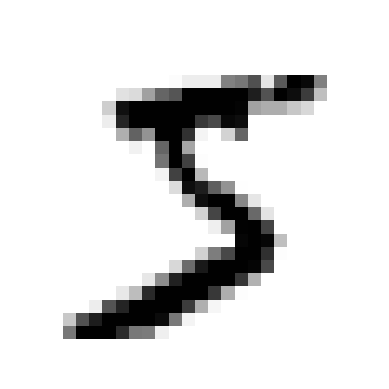

In [13]:
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [14]:
y[0]

'5'

In [15]:
type(y)

pandas.core.series.Series

In [16]:
import numpy as np

In [17]:
y = y.astype(np.uint8)

# Train - Test Split

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
type(X_train)

pandas.core.frame.DataFrame

In [20]:
y_train_5 = (y_train == 5)

In [21]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [22]:
y_test_5 = (y_test == 5)

# Stochastic Gradient Descent

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
sgd_clf = SGDClassifier(random_state = 42)

In [25]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [26]:
sgd_clf.predict([some_digit])

C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# Implementing Cross Validation

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [28]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)

In [29]:
skfolds.split(X_train, y_train_5)

<generator object _BaseKFold.split at 0x0000023A2470ACE0>

In [30]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    print("Train index:", train_index)
    print("Size of train index:", np.size(train_index))
    print("Test Index:", test_index)
    print("Size of test index:", np.size(test_index))
    print("\n")

Train index: [    1     3     4 ... 59994 59996 59998]
Size of train index: 40000
Test Index: [    0     2     6 ... 59995 59997 59999]
Size of test index: 20000


Train index: [    0     2     3 ... 59997 59998 59999]
Size of train index: 40000
Test Index: [    1    10    11 ... 59988 59989 59991]
Size of test index: 20000


Train index: [    0     1     2 ... 59995 59997 59999]
Size of train index: 40000
Test Index: [    3     4     5 ... 59994 59996 59998]
Size of test index: 20000




In [31]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index,:]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index,:]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred)) 

0.9669
0.91625
0.96785


In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [34]:
from sklearn.base import BaseEstimator

In [35]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        return self

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [36]:
never_5_clf = Never5Classifier()

In [37]:
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])

# Confusion Matrix

In [38]:
from sklearn.model_selection import cross_val_predict

In [39]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [40]:
y_train_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [43]:
y_train_perfect_predictions = y_train_5

In [44]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

# Precision and Recall

In [45]:
from sklearn.metrics import precision_score, recall_score

In [46]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [47]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

# F1 Score

In [48]:
from sklearn.metrics import f1_score

In [49]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

# Precision Recall Trade Off

In [50]:
y_scores = sgd_clf.decision_function([some_digit])

C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [51]:
y_scores

array([2164.22030239])

In [52]:
threshold = 0

In [53]:
y_some_digit_pred = (y_scores > threshold)

In [54]:
y_some_digit_pred

array([ True])

In [55]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)

In [56]:
y_some_digit_pred

array([False])

In [57]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

In [58]:
from sklearn.metrics import precision_recall_curve

In [59]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [60]:
precisions, recalls, thresholds

(array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ], shape=(60001,)),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00], shape=(60001,)),
 array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
          38871.26391927,   42216.05562787,   49441.43765905],
       shape=(60000,)))

In [61]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.legend(loc = "best")
    plt.xlabel("Threshold")
    plt.grid()

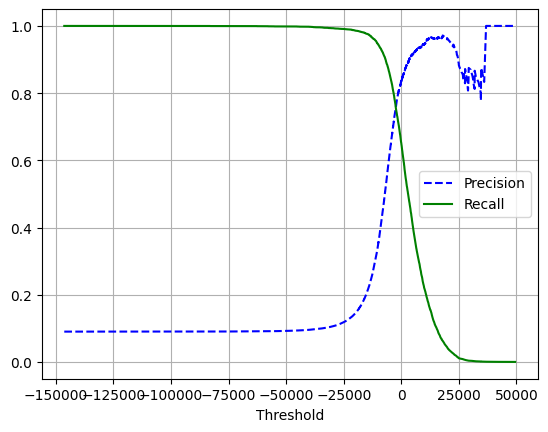

In [62]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

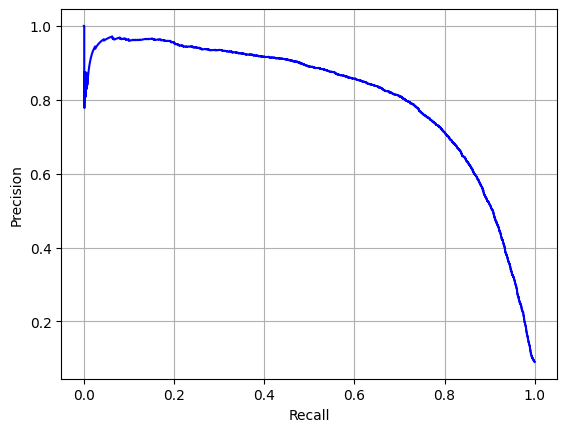

In [63]:
plt.plot(recalls, precisions, "b-")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()

In [64]:
precisions >= 0.90

array([False, False, False, ...,  True,  True,  True], shape=(60001,))

In [65]:
np.argmax(precisions >= 0.90)

np.int64(57109)

In [66]:
np.argmax([0, 1,2,2,3,4,3,3,4,4,3]) 

np.int64(5)

In [67]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [68]:
threshold_90_precision

np.float64(3370.0194991439557)

In [69]:
y_train_pred_90 = (y_scores > threshold_90_precision)

In [70]:
y_train_pred_90

array([False, False, False, ...,  True, False, False], shape=(60000,))

In [71]:
precision_score(y_train_5, y_train_pred_90)

0.9

In [72]:
recall_score(y_train_5, y_train_pred_90)

0.47980077476480354

# The ROC Curve

In [73]:
from sklearn.metrics import roc_curve

In [74]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [75]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1],"k--") #dashed line
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.grid()


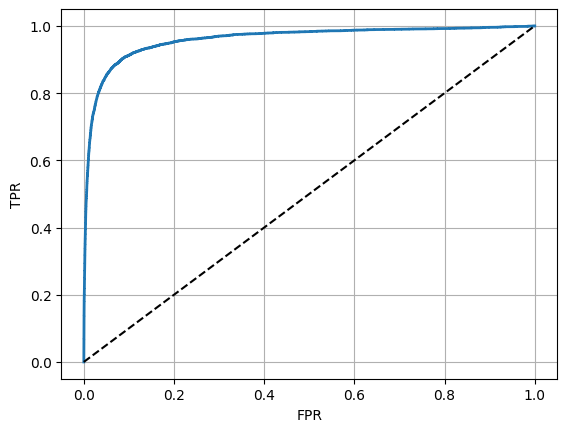

In [76]:
plot_roc_curve(fpr, tpr)
plt.show()

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

## ROC Curve of a Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
forest_clf = RandomForestClassifier(random_state = 42)

In [81]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, 
                                    cv = 3, method = "predict_proba")                                   

In [82]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]], shape=(60000, 2))

In [83]:
y_scores_forest = y_probas_forest[:, 1] #score = probability of positive class

In [84]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

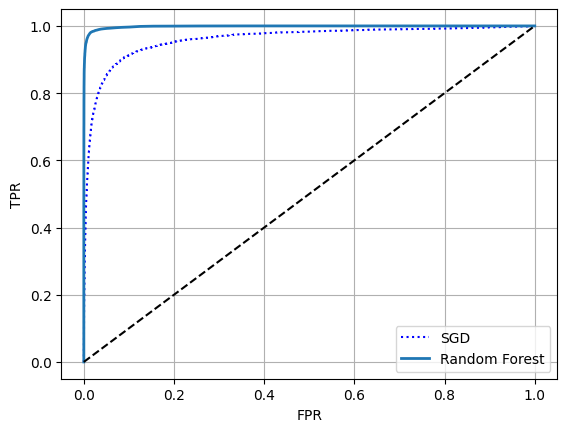

In [85]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [86]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

In [87]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3)

In [88]:
precision_score(y_train_5, y_pred_forest)

0.9905083315756169

In [89]:
recall_score(y_train_5, y_pred_forest)

0.8662608374838591

# Support Vector Machine

In [90]:
from sklearn.svm import SVC

In [91]:
svm_clf = SVC()

In [92]:
svm_clf.fit(X_train, y_train)

SVC()

In [93]:
svm_clf.predict([some_digit])

C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [94]:
some_digit_scores = svm_clf.decision_function([some_digit])

C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [95]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [96]:
np.argmax(some_digit_scores)

np.int64(5)

In [97]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [98]:
svm_clf.classes_[np.argmax(some_digit_scores)]

np.uint8(5)

# OvR Strategy

In [99]:
from sklearn.multiclass import OneVsRestClassifier

In [100]:
ovr_clf = OneVsRestClassifier(SVC())

In [112]:
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [113]:
ovr_clf.predict([some_digit])

C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC wa

array([5], dtype=uint8)

In [114]:
len(ovr_clf.estimators_)

10

In [102]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [103]:
sgd_clf.predict([some_digit])

C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [104]:
sgd_clf.decision_function([some_digit])

C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [105]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.87365, 0.85835, 0.8689 ])

Scaling the data

In [106]:
X_train.dtypes

pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 784, dtype: object

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()

In [109]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [110]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.8983, 0.891 , 0.9018])